In [21]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [3]:
os.chdir('/projects/canis/eoc_feature_corr')

In [40]:
grid_path = "data/by_state/ME/me_extent_1km_grid.shp"
original_grid = gd.read_file(grid_path)
original_grid = original_grid.set_index('id')
grid = original_grid

In [41]:
chg_path = "data/challenger_speed_tests/chg_23_entity_31168_challenger_speed_tests_valid_certified.csv"
chg_data = pd.read_csv(chg_path, parse_dates=['timestamp'])

chg = gd.GeoDataFrame(chg_data, geometry=gd.points_from_xy(chg_data.longitude, chg_data.latitude)).set_crs("EPSG:4326").to_crs(grid.crs)

In [42]:
chg[chg['provider_name'] == 'Verizon Wireless']

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,provider_name,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
0,45.375099,-68.601318,2018-06-12 14:10:24-04:00,0.00,0.0,0,70,Verizon Wireless,73,7978,2,XCAL-M,23.21.101.24,31168,23,5038,2642,POINT (-7636663.788 5680767.717)
1,45.375099,-68.601318,2018-06-12 14:10:25-04:00,0.00,0.0,0,70,Verizon Wireless,73,7978,2,XCAL-M,23.21.101.24,31168,23,5038,2642,POINT (-7636663.788 5680767.717)
2,45.375099,-68.601318,2018-06-12 14:10:26-04:00,-106.06,0.0,0,70,Verizon Wireless,73,7978,2,XCAL-M,23.21.101.24,31168,23,5038,2642,POINT (-7636663.788 5680767.717)
3,45.375099,-68.601318,2018-06-12 14:10:27-04:00,-105.81,0.0,0,70,Verizon Wireless,73,7978,2,XCAL-M,23.21.101.24,31168,23,5038,2642,POINT (-7636663.788 5680767.717)
4,45.375099,-68.601318,2018-06-12 14:10:28-04:00,-107.31,0.0,0,70,Verizon Wireless,73,7978,2,XCAL-M,23.21.101.24,31168,23,5038,2642,POINT (-7636663.788 5680767.717)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073690,44.491761,-68.868517,2018-10-25 15:44:05-04:00,-106.06,0.0,69,70,Verizon Wireless,73,1684,2,XCAL-M,23.21.101.24,31168,23,5045,2542,POINT (-7666408.244 5541861.405)
1073692,44.474751,-68.888676,2018-10-25 15:49:01-04:00,0.00,0.0,71,70,Verizon Wireless,73,1684,2,XCAL-M,23.21.101.24,31168,23,5044,2539,POINT (-7668652.334 5539207.357)
1073693,44.474924,-68.888727,2018-10-25 15:49:02-04:00,-95.38,0.0,78,70,Verizon Wireless,73,1684,2,XCAL-M,23.21.101.24,31168,23,5044,2539,POINT (-7668658.011 5539234.346)
1073694,44.475103,-68.888780,2018-10-25 15:49:03-04:00,-100.81,0.0,77,70,Verizon Wireless,73,1684,2,XCAL-M,23.21.101.24,31168,23,5044,2539,POINT (-7668663.911 5539262.271)


In [43]:
chg.groupby('provider_name').count()

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
provider_name,,,,,,,,,,,,,,,,,
AT&T,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510,53510
Sprint,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116,6116
Sprint S8,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311
T-Mobile GS8-Active,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480,261480
Verizon Wireless,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279,752279


In [44]:
verizon_path = "data/by_state/ME/me_extent_verizon.shp"
verizon = gd.read_file(verizon_path).to_crs(grid.crs)

<AxesSubplot:>

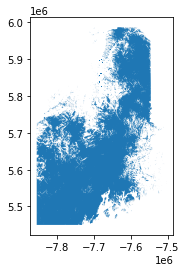

In [45]:
verizon.plot()

In [46]:
# 0 is no signal strength, and in future calculations we consider 
# -120 signal strength to be no signal. As we use median power 
# the impacts to the mean this causes do not matter.
chg['signal_strength'] = chg['signal_strength'].replace(0,-120)

In [47]:
# this lables every point with a grid ID, collecting the grid IDs
# that have extant measurements
chg_grid = gd.sjoin(chg, grid, how='left', op='within')

In [48]:
chg_grid.groupby('index_right').median()['signal_strength']

index_right
462.0       -96.055
463.0      -102.590
464.0       -99.260
467.0       -84.250
1001.0      -95.550
             ...   
206582.0   -120.540
207118.0   -117.160
207119.0   -123.710
208194.0   -119.235
208731.0   -116.375
Name: signal_strength, Length: 9131, dtype: float64

In [49]:
grid['med_rxpwr'] = chg_grid.groupby('index_right').median()['signal_strength']
grid = grid.dropna()

In [50]:
original_grid['centroid'] = original_grid['geometry'].centroid
original_grid = original_grid.set_geometry('centroid')
fcc_grid = gd.sjoin(original_grid, verizon, how="left", op="within").dropna()
original_grid = original_grid.set_geometry('geometry')
original_grid = original_grid.drop('centroid', axis=1)

In [51]:
grid['chg_coverage'] = grid['med_rxpwr'] > -110
grid['verizon_coverage'] = grid.index.isin(fcc_grid.index)

In [52]:
grid.to_file("./data/by_state/ME/me_extent_coverage.shp")

In [53]:
grid

,left,top,right,bottom,geometry,med_rxpwr,chg_coverage,verizon_coverage
id,,,,,,,,
462.0,-7.855368e+06,5.525930e+06,-7.854368e+06,5.524930e+06,"POLYGON ((-7855367.514 5525929.661, -7854367.5...",-96.055,True,True
463.0,-7.855368e+06,5.524930e+06,-7.854368e+06,5.523930e+06,"POLYGON ((-7855367.514 5524929.661, -7854367.5...",-102.590,True,True
464.0,-7.855368e+06,5.523930e+06,-7.854368e+06,5.522930e+06,"POLYGON ((-7855367.514 5523929.661, -7854367.5...",-99.260,True,True
467.0,-7.855368e+06,5.520930e+06,-7.854368e+06,5.519930e+06,"POLYGON ((-7855367.514 5520929.661, -7854367.5...",-84.250,True,True
1001.0,-7.854368e+06,5.523930e+06,-7.853368e+06,5.522930e+06,"POLYGON ((-7854367.514 5523929.661, -7853367.5...",-95.550,True,True
...,...,...,...,...,...,...,...,...
206582.0,-7.471368e+06,5.613930e+06,-7.470368e+06,5.612930e+06,"POLYGON ((-7471367.514 5613929.661, -7470367.5...",-120.540,False,False
207118.0,-7.470368e+06,5.614930e+06,-7.469368e+06,5.613930e+06,"POLYGON ((-7470367.514 5614929.661, -7469367.5...",-117.160,False,False
207119.0,-7.470368e+06,5.613930e+06,-7.469368e+06,5.612930e+06,"POLYGON ((-7470367.514 5613929.661, -7469367.5...",-123.710,False,False


In [54]:
confusion_matrix = pd.crosstab(grid['chg_coverage'], grid['verizon_coverage'], rownames=['Challenger Cover'], colnames=['FCC 477 Verizon Coverage'])
print (confusion_matrix)

FCC 477 Verizon Coverage  False  True 
Challenger Cover                      
False                       533   5050
True                        139   3409


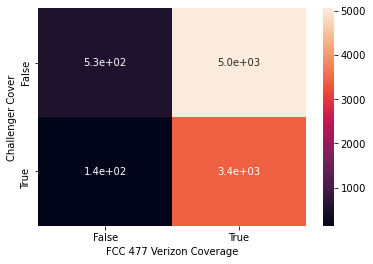

In [55]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()